**Reminder Use the following command instead of jupyter notebook in Power Shell**

**jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10**

## Import the Libraries

In [1]:
import nltk
import pandas as pd
import numpy as np
import re #here re stands for regular expression library
import enchant #spell checker and word finder library
from wordcloud import WordCloud
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Load the Extracted Data

In [2]:
df=pd.read_csv('ytb_comments.csv')
df.head()

,cid,text,time,author,channel,votes,photo,heart
0,UgzSJRVOCZA0C4VXtYt4AaABAg,"First you ask yourself, what is the benefit of...",1 year ago,Nitheesh Kumar,UCjh9s_65o5c7Z6SBZHEg5wQ,9,https://yt3.ggpht.com/ytc/AKedOLTWXpxmvbYv2Mnv...,False
1,UgzBwbvfyZOSEhUpeRd4AaABAg,other progress and improvements of Indian rail...,3 years ago,Gurmeet Anand,UCL7tLHhfDj_VXyTLAVgLpKQ,3,https://yt3.ggpht.com/ytc/AKedOLRgbwGRodJtSwQ_...,False
2,UgzWQXS9NYwa7Bdbi-54AaABAg,The bullet train is just the start. India need...,4 years ago,Ęÿūį Æßñ,UCryrYEvV0pxK0wQgK4wp8XQ,50,https://yt3.ggpht.com/ytc/AKedOLTFdLMRMYCGD__-...,False
3,Ugy44dbTkj8rVNyVtAd4AaABAg,The same type of Gyan was distributed on the t...,3 years ago,Anil Kumar,UCqzd9KoBeC12qRaTlvvA9yw,26,https://yt3.ggpht.com/ytc/AKedOLREuyIrcxupZiw5...,False
4,UgxQkIE7R23I5_6ltZp4AaABAg,There is always two ways in life .. 1. Renovat...,4 years ago,Shyamali Setua,UCr3B7VfVZFl3O8WerMw5sCQ,0,https://yt3.ggpht.com/ytc/AKedOLT61hISr1dn1iJn...,False


In [3]:
df.drop(['cid','time','author','channel','photo','heart'],axis=1,inplace=True)

In [4]:
df.index=[i for i in range(len(df))]
df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            24460, 24461, 24462, 24463, 24464, 24465, 24466, 24467, 24468,
            24469],
           dtype='int64', length=24470)

In [5]:
for i in range(len(df)):
    if(str(df.loc[i]['votes']).find('2.5K')!=-1):
        print(i)

11949


In [6]:
df.votes[11949]=2500

In [7]:
for i in range(len(df)):
    df.loc[[i],['votes']]=int(df.loc[i]['votes'])#converting votes to int
    df.loc[[i],['text']]=df.loc[i]['text'].lower()#converting text to lower case
    df.loc[[i],['text']]=re.sub('[^a-zA-Z 0-9]','',df.text[i])#removing all the characters except a-z,A-Z,0-9 and space
df

,text,votes
0,first you ask yourself what is the benefit of ...,9
1,other progress and improvements of indian rail...,3
2,the bullet train is just the start india needs...,50
3,the same type of gyan was distributed on the t...,26
4,there is always two ways in life 1 renovation...,0
...,...,...
24465,daund manmad double kela tar hi line karaychi ...,0
24466,ha project approve zalay khup adhi survey comp...,3
24467,80 state gov contribution 20 direct 60 karja...,0
24468,kyo bhai,0


## Word Tokenization

In [8]:
#Word Tokenization and removing the words that are not the part of English Language

e = enchant.Dict("en_US")
a=[]
for i in range(len(df)):
    b=[]
    j=nltk.word_tokenize(df.text[i])
    for k in j:
        if(e.check(k)==True):
           b.append(k)
    a.append(b)
print(a)

[['first', 'you', 'ask', 'yourself', 'what', 'is', 'the', 'benefit', 'of', 'over', 'then', 'you', 'will', 'understand', 'how', 'bullet', 'train', 'is', 'going', 'benefit', 'the', 'country'], ['other', 'progress', 'and', 'improvements', 'of', 'railways', 'are', 'already', 'catching', 'momentum', 'they', 'have', 'not', 'stopped'], ['the', 'bullet', 'train', 'is', 'just', 'the', 'start', 'needs', 'to', 'make', 'more', 'highways', 'and', 'freeways', 'so', 'goods', 'can', 'be', 'distributed', 'throughout', 'faster', 'thus', 'allowing', 'economic', 'growth'], ['the', 'same', 'type', 'of', 'was', 'distributed', 'on', 'the', 'time', 'of', 'metro', 'i', 'still', 'remember', 'the', 'way', 'opposing', 'that', 'project', 'ki', 'for', 'es', 'project', 'ho', 'but', 'today', 'everyone', 'know', 'the', 'reality', 'of', 'metro'], ['there', 'is', 'always', 'two', 'ways', 'in', 'life', '1', 'you', 'repair', 'and', 'create', 'the', 'traditional', 'you', 'put', 'your', 'foot', 'one', 'step', 'you', 'watch'

## Lemmatization and Stopwords Removal

In [9]:
# lemmatizing and stopwords removal

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer=WordNetLemmatizer()

d=[]
for i in a:
    b=''
    for j in range(len(i)):
        if(i[j] not in stopwords.words('english') and len(i[j])>3):
            b=b+lemmatizer.lemmatize(i[j])+' '
    d.append(b)
d

['first benefit understand bullet train going benefit country ',
 'progress improvement railway already catching momentum stopped ',
 'bullet train start need make highway freeway good distributed throughout faster thus allowing economic growth ',
 'type distributed time metro still remember opposing project project today everyone know reality metro ',
 'always way life repair create traditional foot step watch difference operator wear race came revolution ',
 'taught slave think like business bullet train came country without knowing answer trying show wrongly ',
 'bullet train growth hind ',
 'fare actually job directly indirectly created company grow well development route thing appreciate infrastructure introduced developed understand passenger biggest culprit railway condition today ',
 'think government already considered point beyond point think team well trained educated capable take decision train thank ',
 '',
 'technology transfer country decision long technology within deca

In [10]:
final_df=pd.concat([pd.DataFrame(d,columns=['processed_comments']),df['votes']],axis=1)
final_df_1=final_df.copy()
final_df

,processed_comments,votes
0,first benefit understand bullet train going be...,9
1,progress improvement railway already catching ...,3
2,bullet train start need make highway freeway g...,50
3,type distributed time metro still remember opp...,26
4,always way life repair create traditional foot...,0
...,...,...
24465,double line,0
24466,project approve survey completion work start n...,3
24467,state contribution direct central,0
24468,,0


In [11]:
final_df.processed_comments.value_counts()

                                                                                                                                                                                                                                                                                                                                                                                          5831
bullet train                                                                                                                                                                                                                                                                                                                                                                               369
train                                                                                                                                                                                                                                     

In [12]:
to_drop=final_df[final_df.processed_comments==''].index
final_df.drop(to_drop,axis=0,inplace=True)
final_df.index=[i for i in range(len(final_df))]
final_df

,processed_comments,votes
0,first benefit understand bullet train going be...,9
1,progress improvement railway already catching ...,3
2,bullet train start need make highway freeway g...,50
3,type distributed time metro still remember opp...,26
4,always way life repair create traditional foot...,0
...,...,...
18634,know percent population poverty line want gove...,2
18635,double line,0
18636,project approve survey completion work start n...,3
18637,state contribution direct central,0


## Labelling the Unlabelled Data

In [13]:
sentiments = SentimentIntensityAnalyzer()
final_df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in final_df["processed_comments"]]
final_df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in final_df["processed_comments"]]
final_df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in final_df["processed_comments"]]
final_df['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in final_df["processed_comments"]]
final_df.head()

,processed_comments,votes,Positive,Negative,Neutral,Compound
0,first benefit understand bullet train going be...,9,0.500,0.000,0.500,0.7184
1,progress improvement railway already catching ...,3,0.496,0.162,0.342,0.5994
2,bullet train start need make highway freeway g...,50,0.358,0.000,0.642,0.6908
3,type distributed time metro still remember opp...,26,0.000,0.000,1.000,0.0000
4,always way life repair create traditional foot...,0,0.130,0.000,0.870,0.2732


### According to the Industry Standards:

If the compound score >= 0.05, then it is categorized as Positive.

If the compound score <= -0.05, then it is categorized as Negative.

If the compound score falls in the range (-0.05 - 0.05) then it is categorized as Neutral.

In [14]:
score = final_df["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
final_df["Sentiment"] = sentiment
final_df.head()

,processed_comments,votes,Positive,Negative,Neutral,Compound,Sentiment
0,first benefit understand bullet train going be...,9,0.500,0.000,0.500,0.7184,Positive
1,progress improvement railway already catching ...,3,0.496,0.162,0.342,0.5994,Positive
2,bullet train start need make highway freeway g...,50,0.358,0.000,0.642,0.6908,Positive
3,type distributed time metro still remember opp...,26,0.000,0.000,1.000,0.0000,Neutral
4,always way life repair create traditional foot...,0,0.130,0.000,0.870,0.2732,Positive


In [15]:
final_df.replace('Positive',1,inplace=True)
final_df.replace('Negative',-1,inplace=True)
final_df.replace('Neutral',0,inplace=True)
final_df

,processed_comments,votes,Positive,Negative,Neutral,Compound,Sentiment
0,first benefit understand bullet train going be...,9,0.500,0.000,0.500,0.7184,1
1,progress improvement railway already catching ...,3,0.496,0.162,0.342,0.5994,1
2,bullet train start need make highway freeway g...,50,0.358,0.000,0.642,0.6908,1
3,type distributed time metro still remember opp...,26,0.000,0.000,1.000,0.0000,0
4,always way life repair create traditional foot...,0,0.130,0.000,0.870,0.2732,1
...,...,...,...,...,...,...,...
18634,know percent population poverty line want gove...,2,0.236,0.400,0.364,-0.5719,-1
18635,double line,0,0.000,0.000,1.000,0.0000,0
18636,project approve survey completion work start n...,3,0.000,0.000,1.000,0.0000,0
18637,state contribution direct central,0,0.000,0.000,1.000,0.0000,0


## Insights after Labelling

In [16]:
final_df.Sentiment.value_counts()

 0    10213
 1     6126
-1     2300
Name: Sentiment, dtype: int64

<BarContainer object of 3 artists>

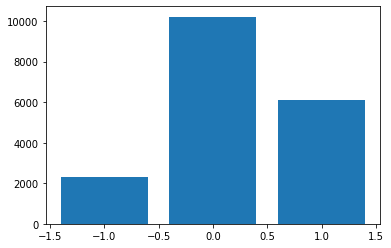

In [17]:
plt.bar([0,1,-1],final_df.Sentiment.value_counts())

## WordClouds :Used to display the most frequent words in a Text Body 

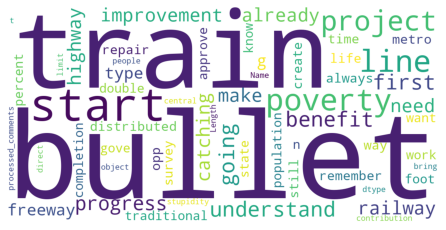

In [18]:
wordcloud = WordCloud(width = 1200, height = 600,
                background_color ='white',
                min_font_size = 7,random_state=42).generate(str(final_df.processed_comments))
 
# plot the WordCloud image                      
plt.figure(figsize = (6,6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Converting Text Data to Numeric using TfidfVectorizer

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
final_df.processed_comments.values

array(['first benefit understand bullet train going benefit country ',
       'progress improvement railway already catching momentum stopped ',
       'bullet train start need make highway freeway good distributed throughout faster thus allowing economic growth ',
       ...,
       'project approve survey completion work start news paper news land purchase ',
       'state contribution direct central ',
       'stupidity limit project bring people poverty thousand people sleep without food stop eating feed '],
      dtype=object)

In [21]:
vectorizer = TfidfVectorizer(max_features=5000)
features = vectorizer.fit_transform(final_df.processed_comments.values)
tdf=pd.DataFrame(features.toarray())
tdf['Sentiment']=final_df['Sentiment']
tdf

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,Sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
18635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
18636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
18637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [22]:
features.shape

(18639, 5000)

## Performing Train_Test_Split on our Converted Data

In [23]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(tdf,test_size=0.2,random_state=42)
x_train=train_set.drop(['Sentiment'],axis=1)
y_train=train_set.Sentiment
x_test=test_set.drop(['Sentiment'],axis=1)
y_test=test_set.Sentiment

## Model Building

We will be using the under mentioned Classifiers in order to train and test the accuracy of the model.

1.Multinomial Naive Bayes Classifier

2.K Nearest Neighbors Classifier

3.Random Forest Classifier

## MultinomialNB

In [24]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

### Classification Report for MultinomialNB

In [25]:
print('train_predicted')
pred=pd.DataFrame(model.predict(x_train))
print(pred.value_counts())
print("\n")
print('train_actual')
print(y_train.value_counts())

train_predicted
 0    9306
 1    4914
-1     691
dtype: int64


train_actual
 0    8132
 1    4925
-1    1854
Name: Sentiment, dtype: int64


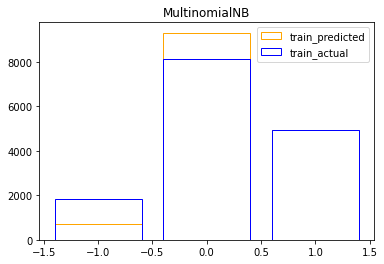

In [26]:
plt.bar([0,1,-1],pred.value_counts(),edgecolor='orange',fill=None,label='train_predicted')
plt.bar([0,1,-1],y_train.value_counts(),edgecolor='blue',fill=None,label='train_actual')
plt.title('MultinomialNB')
plt.legend()
plt.show()

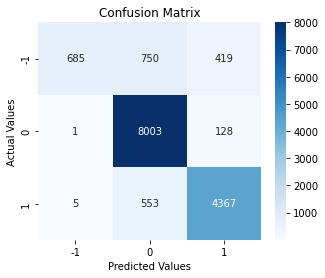

In [27]:
cm=confusion_matrix(y_train,pred)
cm_df = pd.DataFrame(cm,index = [-1,0,1],columns = [-1,0,1])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,cmap="Blues",fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [28]:
print('Training classification_report')
print(classification_report(y_train,pred))

Training classification_report
              precision    recall  f1-score   support

          -1       0.99      0.37      0.54      1854
           0       0.86      0.98      0.92      8132
           1       0.89      0.89      0.89      4925

    accuracy                           0.88     14911
   macro avg       0.91      0.75      0.78     14911
weighted avg       0.89      0.88      0.86     14911



In [29]:
print('train accuracy_score MNB',accuracy_score(pred,y_train))
print('test accuracy_score MNB',accuracy_score(model.predict(x_test),y_test))

train accuracy_score MNB 0.8755281335926497
test accuracy_score MNB 0.8361051502145923


## KNearestNeighborClassifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier as KNC
model=KNC(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### Classification Report for KNearestNeighborClassifier

In [31]:
print('train_predicted')
pred=pd.DataFrame(model.predict(x_train))
print(pred.value_counts())
print("\n")
print('train_actual')
print(y_train.value_counts())

train_predicted
 0    11452
 1     2570
-1      889
dtype: int64


train_actual
 0    8132
 1    4925
-1    1854
Name: Sentiment, dtype: int64


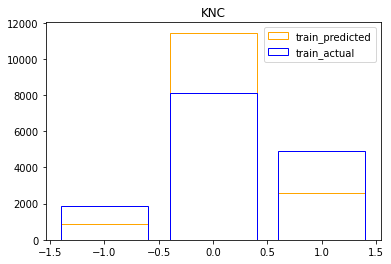

In [32]:
plt.bar([0,1,-1],pred.value_counts(),edgecolor='orange',fill=None,label='train_predicted')
plt.bar([0,1,-1],y_train.value_counts(),edgecolor='blue',fill=None,label='train_actual')
plt.title('KNC')
plt.legend()
plt.show()

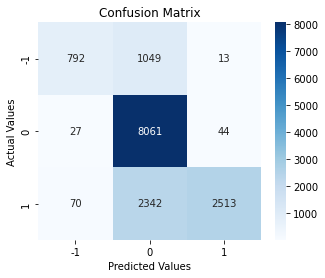

In [33]:
cm=confusion_matrix(y_train,pred)
cm_df = pd.DataFrame(cm,index = [-1,0,1],columns = [-1,0,1])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,cmap="Blues",fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [34]:
print('Training classification_report')
print(classification_report(y_train,pred))

Training classification_report
              precision    recall  f1-score   support

          -1       0.89      0.43      0.58      1854
           0       0.70      0.99      0.82      8132
           1       0.98      0.51      0.67      4925

    accuracy                           0.76     14911
   macro avg       0.86      0.64      0.69     14911
weighted avg       0.82      0.76      0.74     14911



In [35]:
print('train accuracy_score KNC',accuracy_score(pred,y_train))
print('test accuracy_score KNC',accuracy_score(model.predict(x_test),y_test))

train accuracy_score KNC 0.7622560525786333
test accuracy_score KNC 0.7223712446351931


## Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier as RFC
model=RFC(max_features=500,max_depth=10)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, max_features=500)

### Classification Report for Random Forest Classifier

In [37]:
print('train_predicted')
pred=pd.DataFrame(model.predict(x_train))
print(pred.value_counts())
print("\n")
print('train_actual')
print(y_train.value_counts())

train_predicted
 0    11827
 1     2903
-1      181
dtype: int64


train_actual
 0    8132
 1    4925
-1    1854
Name: Sentiment, dtype: int64


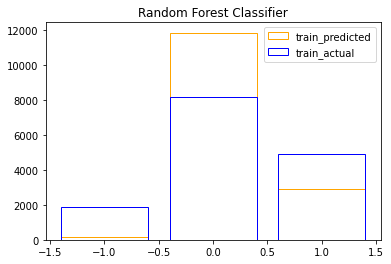

In [38]:
plt.bar([0,1,-1],pred.value_counts(),edgecolor='orange',fill=None,label='train_predicted')
plt.bar([0,1,-1],y_train.value_counts(),edgecolor='blue',fill=None,label='train_actual')
plt.title('Random Forest Classifier')
plt.legend()
plt.show()

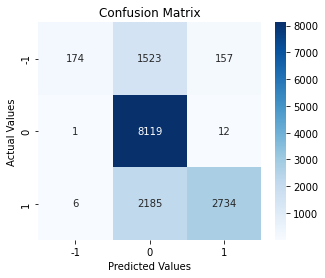

In [39]:
cm=confusion_matrix(y_train,pred)
cm_df = pd.DataFrame(cm,index = [-1,0,1],columns = [-1,0,1])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,cmap="Blues",fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [40]:
print('Training classification_report')
print(classification_report(y_train,pred))

Training classification_report
              precision    recall  f1-score   support

          -1       0.96      0.09      0.17      1854
           0       0.69      1.00      0.81      8132
           1       0.94      0.56      0.70      4925

    accuracy                           0.74     14911
   macro avg       0.86      0.55      0.56     14911
weighted avg       0.80      0.74      0.70     14911



In [41]:
print('train accuracy_score Random Forest Classifier',accuracy_score(pred,y_train))
print('test accuracy_score Random Forest Classifier',accuracy_score(model.predict(x_test),y_test))

train accuracy_score Random Forest Classifier 0.7395211588759976
test accuracy_score Random Forest Classifier 0.744098712446352


## Conclusion
Based on the accuracy scores and the classification reports of the above three models we came to know that **Multinomial NB Classifier** outperforms the rest of two thus it will be a good decision for us to go with it.

## Notes

### Maths Behind the Classification Report

### How to calculate FN, FP, TN, TP ?

FN: The False-negative value for a class will be the sum of values of corresponding rows except for the TP value.

FP: The False-positive value for a class will be the sum of values of the corresponding column except for the TP value.

TN: The True Negative value for a class will be the sum of values of all columns and rows except the values of that class that we are calculating the values for.

TP: The True positive value is where the actual value and predicted value are the same.


### Three class classification

* Let us calculate the TP, TN, FP, FN values for the class -1 using the Above tricks:

TP: The actual value and predicted value should be the same = (cell 1) = 127

FN: The sum of values of corresponding rows except the TP value = (cell 2 + cell3) =(186+133)

FP : The sum of values of corresponding column except the TP value = (cell 4 + cell 7) = (0 + 3) = 3

TN: The sum of values of all columns and row except the values of that class that we are calculating the values for 
= (cell 5 + cell 6 + cell 8 + cell 9) = 1983 + 98 + 191 + 1007 = 3279

* Similarly, for 0 the values/ metrics are calculated as below:

TP : 1983 (cell 5)

FN : 0 + 98 = 98 (cell 4 +cell 6)

FP : 186 + 191 = 377 (cell 2 + cell 8)

TN : 127 + 133 + 3 + 1007 = 1270 (cell 1 + cell 3 + cell 7 + cell 9).

* Similarly, for 1 the values/ metrics are calculated as below:

TP : 1007 (cell 9)

FN : 3 + 191 = 194 (cell 7 +cell 8)

FP : 133 + 98 = 231 (cell 3 + cell 6)

TN : 127 + 186 + 0 + 1983 = 2296 (cell 1 + cell 2 + cell 4 + cell 5).

**Precision = TP/Predicted Yes**

**Recall = TP/Actual Yes**

In [43]:
from nbformat import read, NO_CONVERT

with open("Source Code.ipynb") as fp:
    notebook = read(fp, NO_CONVERT)
cells = notebook['cells']
code_cells = [c for c in cells if c['cell_type'] == 'code']
for cell in code_cells:
    print(cell['source'])

import nltk
import pandas as pd
import numpy as np
import re #here re stands for regular expression library
import enchant #spell checker and word finder library
from wordcloud import WordCloud
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
df=pd.read_csv('ytb_comments.csv')
df.head()
df.drop(['cid','time','author','channel','photo','heart'],axis=1,inplace=True)
df.index=[i for i in range(len(df))]
df.index
for i in range(len(df)):
    if(str(df.loc[i]['votes']).find('2.5K')!=-1):
        print(i)
df.votes[11949]=2500
for i in range(len(df)):
    df.loc[[i],['votes']]=int(df.loc[i]['votes'])#converting votes to int
    df.loc[[i],['text']]=df.loc[i]['text'].lower()#converting text to lower case
    df.loc[[i],['text']]=re.sub('[^a-zA-Z 0-9]','',df.t